In [2]:
from torch_geometric.datasets import TUDataset
import numpy as np
from sklearn.decomposition import PCA

In [3]:
ds = TUDataset("/tmp/PROTEINS", "PROTEINS", use_node_attr=True)
ds.num_features, ds.num_classes, len(ds)

Processing...
Done!


(4, 2, 1113)

In [4]:
ds.y.unique()

tensor([0, 1])

In [5]:
ds.num_edge_labels

0

In [6]:
ds.y.sum()/ds.y.shape[0]

tensor(0.4043)

In [7]:
np.unique(ds.x[:,0], axis=0)

array([-538., -345., -344., -134., -125.,  -96.,    1.,    2.,    3.,
          4.,    5.,    6.,    7.,    8.,    9.,   10.,   11.,   12.,
         13.,   14.,   15.,   16.,   17.,   18.,   19.,   20.,   21.,
         22.,   23.,   24.,   25.,   26.,   27.,   28.,   29.,   30.,
         31.,   32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,
         41.,   42.,   47.,   61.,   63.,   73.,   74.,   75.,   82.,
        104.,  353.,  355.,  360.,  558.,  797.,  798.], dtype=float32)

In [8]:
len(np.unique(ds.x[:,0], axis=0))

61

In [9]:
ds.edge_index

tensor([[    0,     0,     0,  ..., 43470, 43470, 43470],
        [   11,    22,    32,  ..., 43438, 43468, 43469]])

In [10]:
ds.num_node_features

4

In [11]:
# Visualize the graph
import networkx as nx
import matplotlib.pyplot as plt

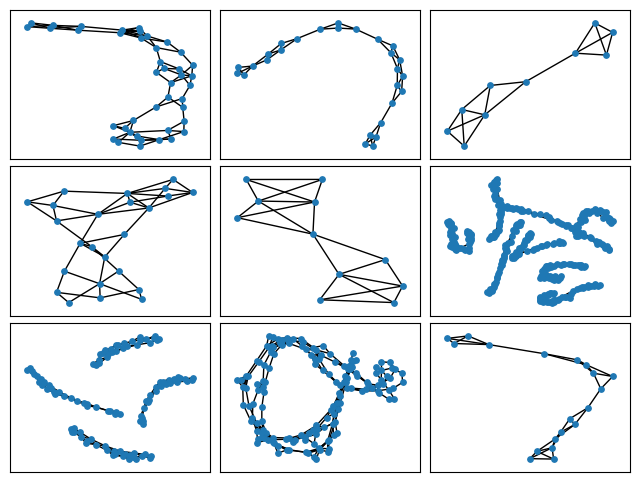

In [12]:
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3, 3, wspace=0.05, hspace=0.05)
axes = gs.subplots()
for i in range(3):
    for j in range(3):
        G = nx.Graph() 
        G.add_edges_from(ds[i*3+j].edge_index.T.tolist())
        nx.draw_networkx(G, ax=axes[i, j], with_labels=False, node_size=15)

In [13]:
pca = PCA(n_components=4)
pca.fit(ds.x)

PCA(n_components=4)

In [14]:
print(pca.explained_variance_ratio_)

[9.96709412e-01 2.99395319e-03 2.96635179e-04 3.84787544e-33]


In [15]:
new_x = pca.transform(ds.x)
new_x

array([[ 1.50952053e+01, -5.45326474e-01, -2.73841761e-02,
        -6.03072446e-16],
       [ 2.09592392e+00, -6.81488027e-01, -3.93894533e-02,
        -6.03072446e-16],
       [ 1.70950947e+01, -5.24378543e-01, -2.55372104e-02,
        -6.03072446e-16],
       ...,
       [-3.91224373e+00, -4.10827076e-02,  1.18200422e+00,
        -5.96923343e-15],
       [-3.91224373e+00, -4.10827076e-02,  1.18200422e+00,
        -5.96923343e-15],
       [-3.91224373e+00, -4.10827076e-02,  1.18200422e+00,
        -5.96923343e-15]])